In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid

In [12]:
ds_seq0=xr.open_dataset('seq0.nc')
ds_seq2=xr.open_dataset('seq2.nc')
ds_seq3=xr.open_dataset('seq3.nc')
ds_scurl0=xr.open_dataset('scurl0.nc')
ds_eq0=xr.open_dataset('eq0.nc')
ds_eq2=xr.open_dataset('eq2.nc')
ds_eq3=xr.open_dataset('eq3.nc')
ds_curl0=xr.open_dataset('curl0.nc')

In [5]:
ds_seq2 = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/seq2_new/linear_d2_cont__4911_274.nc", decode_times=False)
ds_seq3 = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/seq3/linear_d2_cont__5607_060.nc", decode_times=False)
ds_seq0 = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/seq0/linear_d2_cont__5308_170.nc", decode_times=False)
ds_scurl0 = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/seq4/linear_d2_cont__5607_060.nc", decode_times=False)

ds_eq2_cont = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/eq2/linear_d2_cont__4303_021.nc", decode_times=False)
ds_eq3_cont = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/eq3/linear_d2_cont__3208_295.nc", decode_times=False)
ds_eq0_cont = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/eq0/linear_d2_cont__3023_341.nc", decode_times=False)
ds_curl0_cont = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/eq4/new/linear_d2_cont__4208_045.nc", decode_times=False)


ds_seq0_p = xr.open_dataset("/media/mesomiso/T7 Shield/Vortex/executable/seq2_new/linear_d2_prog__4318_017.nc", decode_times=False)


In [13]:
ds_stats1 = xr.open_dataset('/media/mesomiso/T7 Shield/Code/with_precip/ocean_geometry.nc', decode_times=False)
ds_stats1 = ds_stats1.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset
grid1 = Grid(ds_seq0, coords= {'X':{'center':'xh','outer':'xq'}, 'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'zl','outer':'zi'}},periodic=['X'])
# grid2 = Grid(ds_scurl0, coords= {'X':{'center':'xh','outer':'xq'}, 'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'zl'}},periodic=['X'])

dz = grid1.diff(ds_seq0.zi, axis = "Z")

# Eq 0

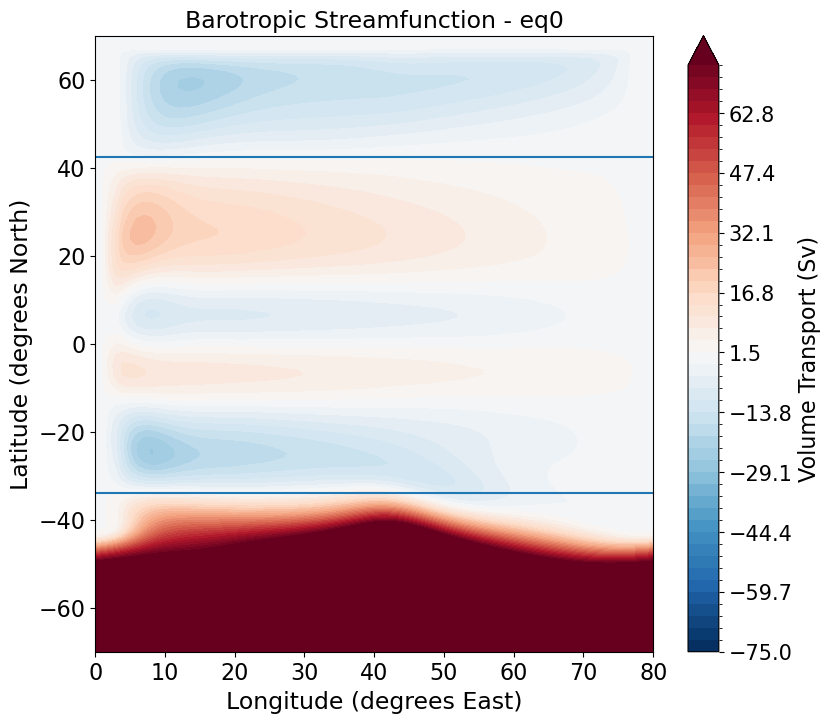

In [14]:
plt.figure(figsize=(9,8))
Uhbt = (ds_eq0.uh).sum('zl')
Psi_u0 = grid1.cumsum(Uhbt, 'Y', boundary='fill')

contour = ((-Psi_u0 * (10**-6)) + 138).plot.contourf(levels=50, cmap='RdBu_r', vmax=75, add_colorbar=False)

plt.title('Barotropic Streamfunction - eq0', fontsize=17)
plt.xlabel('Longitude (degrees East)', fontsize=17)
plt.ylabel('Latitude (degrees North)', fontsize=17)
plt.axhline(y=42.5)
plt.axhline(y=-34)

plt.tick_params(axis='both', labelsize=16)

cbar = plt.colorbar(contour)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Volume Transport (Sv)', fontsize=16)

plt.show()

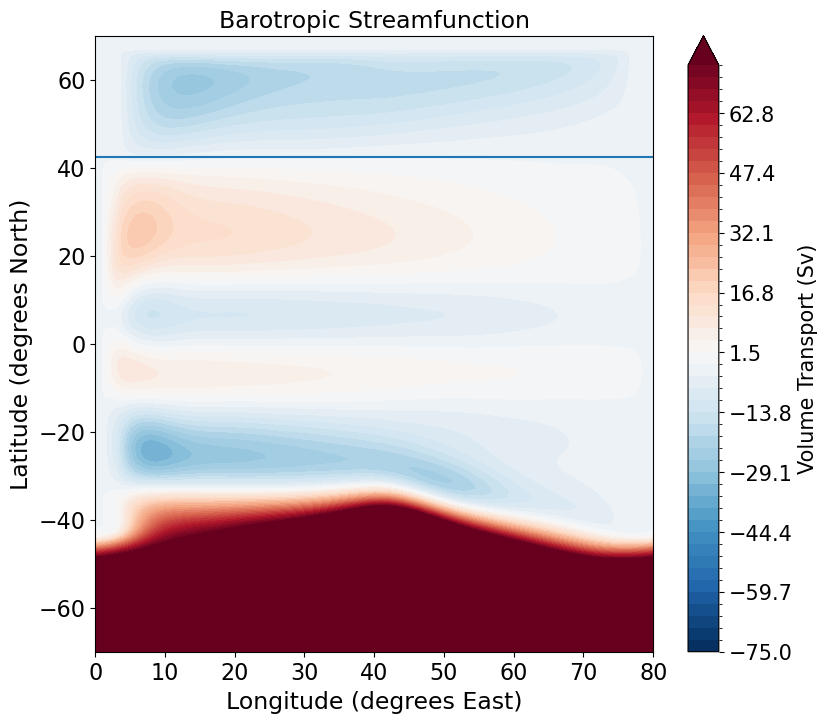

In [16]:
plt.figure(figsize=(9,8))
Uhbt = (ds_seq0.uh).sum('zl')
Psi_u0 = grid1.cumsum(Uhbt, 'Y', boundary='fill')

contour = ((-Psi_u0 * (10**-6) + 170)).plot.contourf(levels=50, cmap='RdBu_r', vmax=75, add_colorbar=False)

plt.title('Barotropic Streamfunction', fontsize=17)
plt.xlabel('Longitude (degrees East)', fontsize=17)
plt.ylabel('Latitude (degrees North)', fontsize=17)
plt.axhline(y=42.5)

plt.tick_params(axis='both', labelsize=16)
cbar = plt.colorbar(contour)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('Volume Transport (Sv)', fontsize=15)  

plt.show()

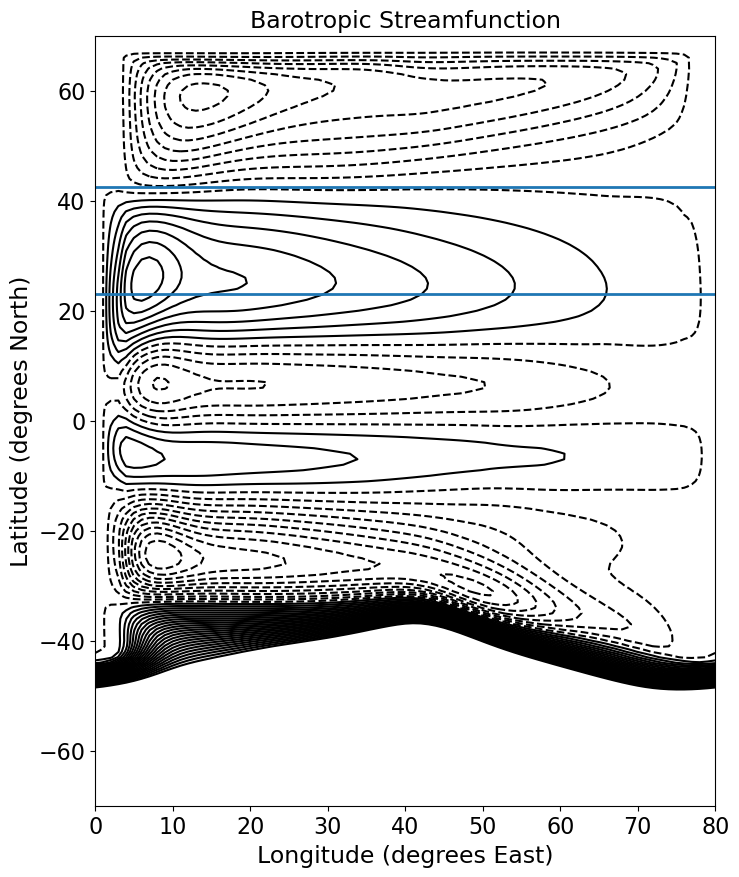

In [17]:
plt.figure(figsize=(8,10))
Uhbt = (ds_seq0.uh).sum('zl')
Psi_u0 = grid1.cumsum(Uhbt, 'Y', boundary='fill')

contour = ((-Psi_u0 * (10**-6) + 170)).plot.contour(levels=50, colors='black', vmax=75, add_colorbar=False)

plt.title('Barotropic Streamfunction', fontsize=17)
plt.xlabel('Longitude (degrees East)', fontsize=17)
plt.ylabel('Latitude (degrees North)', fontsize=17)
plt.axhline(y=42.5, linewidth=2)
plt.axhline(y=23, linewidth=2)
# plt.axhline(y=0, linewidth=2)


plt.tick_params(axis='both', labelsize=16)
plt.show()


# 0.02 seq

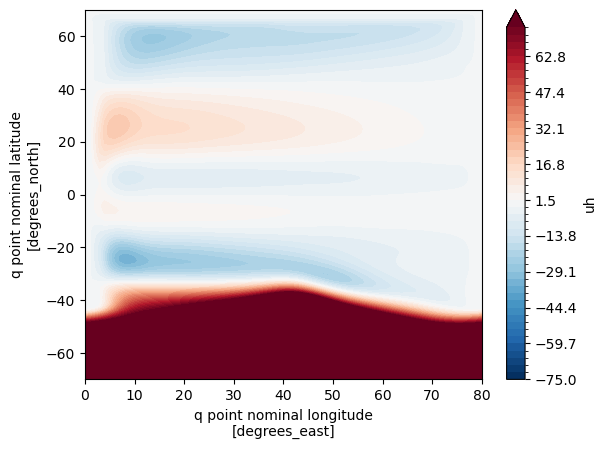

In [18]:
Uhbtw = (ds_seq2.uh).sum('zl')
Psi_u2 =  grid1.cumsum(Uhbtw, 'Y', boundary='fill')
((-Psi_u2*(10**-6)+170)).plot.contourf(levels=50,cmap='RdBu_r',vmax=75)

# 0.03 seq

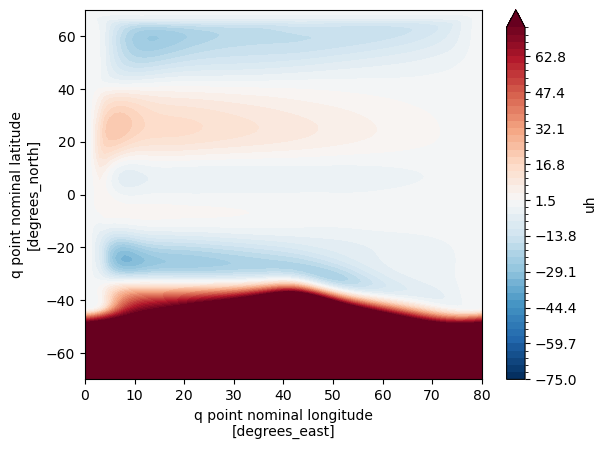

In [19]:
Uhbt3 = (ds_seq3.uh).sum('zl')
Psi_u3 =  grid1.cumsum(Uhbt3, 'Y', boundary='fill')
((-Psi_u3*(10**-6)+170)).plot.contourf(levels=50,cmap='RdBu_r',vmax=75)

# 0.046 seq

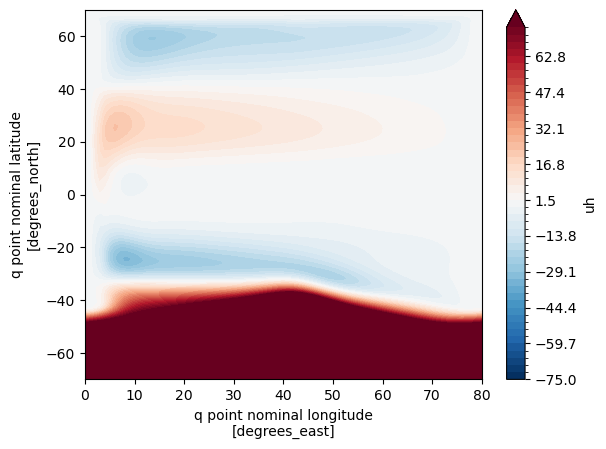

In [20]:
Uhbtc = (ds_scurl0.uh).sum('zl')
Psi_uc =  grid1.cumsum(Uhbtc, 'Y', boundary='fill')
((-Psi_uc*(10**-6)+170)).plot.contourf(levels=50,cmap='RdBu_r',vmax=75)

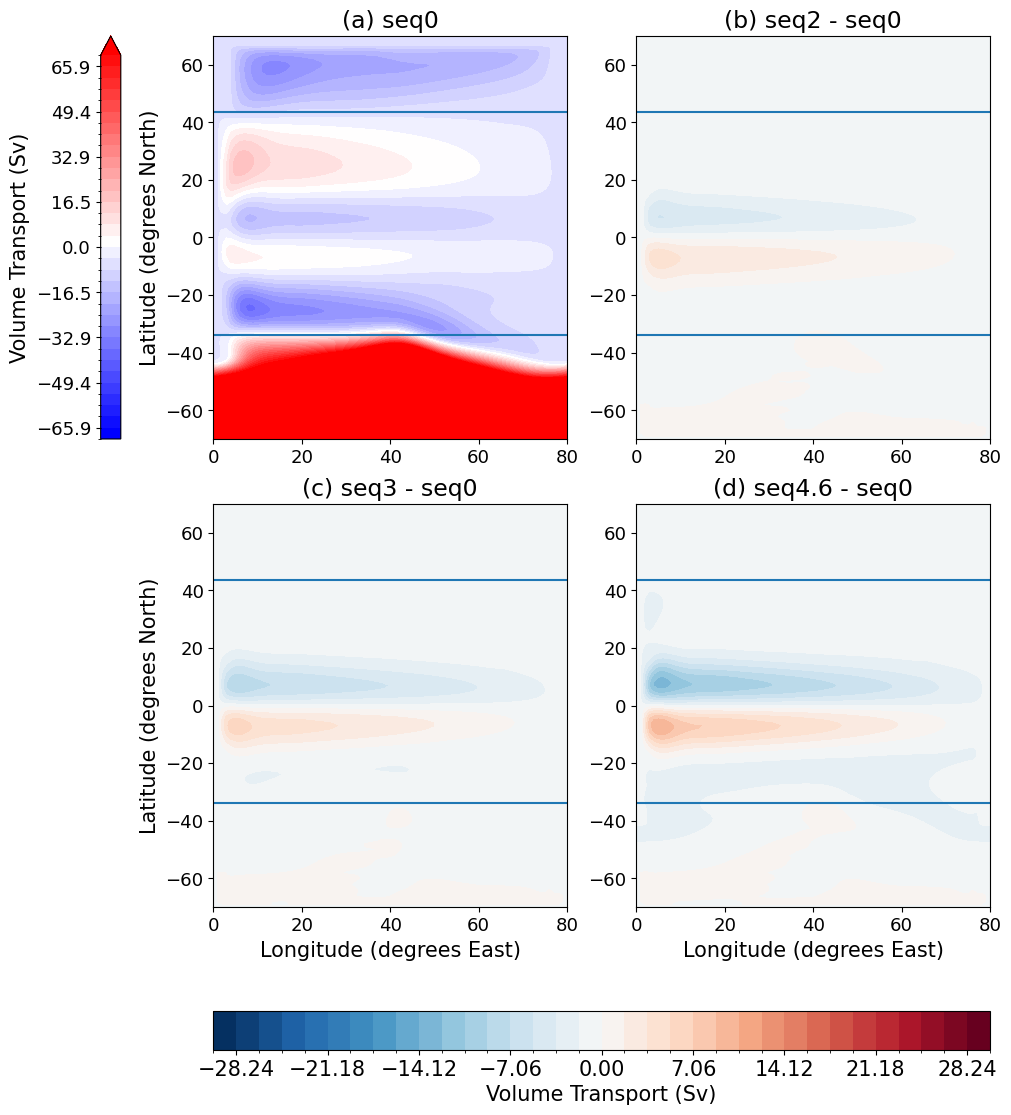

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(10, 11))

contour0=(-Psi_u0*(10**-6)+167).plot.contourf(ax=ax[0,0],levels=35,cmap='bwr', vmax=70, vmin=-70, add_colorbar=False)
contour1=(+Psi_u2*(10**-6)-Psi_u0*(10**-6)).plot.contourf(ax=ax[0,1],levels=35,cmap='RdBu_r', vmax=30, add_colorbar=False)
contour2=(+Psi_u3*(10**-6)-Psi_u0*(10**-6)).plot.contourf(ax=ax[1,0],levels=35,cmap='RdBu_r', vmax=30, add_colorbar=False)
contour3=(+Psi_uc*(10**-6)-Psi_u0*(10**-6)).plot.contourf(ax=ax[1,1],levels=35,cmap='RdBu_r', vmax=30, add_colorbar=False)

contours=[contour0,contour1,contour2,contour3]

ax[0, 0].axhline(y=43.5)
ax[0, 1].axhline(y=43.5)
ax[1, 0].axhline(y=43.5)
ax[1, 1].axhline(y=43.5)

ax[0, 0].axhline(y=-34)
ax[0, 1].axhline(y=-34)
ax[1, 0].axhline(y=-34)
ax[1, 1].axhline(y=-34)

ax[0, 0].set_title("(a) seq0", fontsize =17)
ax[0, 1].set_title("(b) seq2 - seq0", fontsize =17)
ax[1, 1].set_title("(d) seq4.6 - seq0", fontsize =17)
ax[1, 0].set_title("(c) seq3 - seq0", fontsize =17)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Longitude (degrees East)", fontsize = 15)
ax[1,1].set_xlabel("Longitude (degrees East)", fontsize = 15)


ax[0,0].set_ylabel("Latitude (degrees North)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_ylabel('')

# contour0.colorbar.set_label('Volume Transport (Sv)',fontsize=13)

cbar1 = fig.colorbar(contours[0], ax=ax[0,0], location='left')
cbar1.ax.tick_params(labelsize=13)
cbar1.set_label('Volume Transport (Sv)', fontsize=15)
# cbar1 = fig.colorbar(contours[0], ax=ax,orientation='horizontal')
cbar = fig.colorbar(contours[1], ax=ax,orientation='horizontal')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Volume Transport (Sv)', fontsize=15) 